### Question 2:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']


train=pd.read_csv("/home/ashly/Desktop/Machine Learning/Lab Assignment/Lab assignment 10-10-20/processed.cleveland.csv",header=0,names=columns)
train.head()

#Preprocessing the data

#1.Eliminating the Nan values
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [2]:
train['ca']=train['ca'].fillna(train['ca'].mean())
train['thal']=train['thal'].fillna(train['thal'].mean())

In [3]:
train.num
print(train.num.max())
train.num.min()

4


0

In [4]:
#2. Making the  last columns to 1s or 0s
#According the question we need to make all the value above 2 as 1 and below 2 as 0, for performing 
#Logistic regression
def conv(ar):
    if ar<2:
        ar=0
    else:
        ar=1
    return ar
train['final']=train.num.apply(conv)
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,final
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0


In [5]:
train_new=train.drop(['num'], axis=1)
train_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,final
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


<AxesSubplot:>

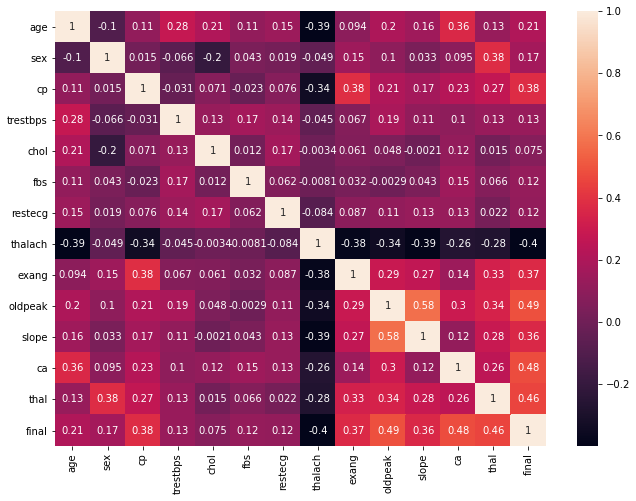

In [6]:
import seaborn as sns
core=train_new.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,8)
sns.heatmap(core,annot=True,xticklabels=core.columns,yticklabels=core.columns)

This would give all the variables and their correlation with the target variable.

In [10]:
#Splitting the target 
X=train_new.drop(['final'],axis=1)

In [16]:
#Applying Logistic regression after SPLITTING the data.
x_train,x_test,y_train,y_test=train_test_split(X,train_new['final'],test_size=0.3,shuffle=True)

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
#After the  logistic regression the theta values are taken to predict
#the values using x_test
y_pred=log_reg.predict(x_test)

y_pred



/home/ashly/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [233]:
# Find the Binary cross entropy loss
loss=log_loss(y_test,y_pred)
loss


4.554625427702633

This gives the cross entropy loss of our model.

In [235]:
#Getting the accuracy_score
score=accuracy_score(y_test,y_pred)
score=str(score*100)+ " %"
print("Thus we can see that our model has a classification accuracy of "+ score)

Thus we can see that our model has a classification accuracy of 86.81318681318682 %


<ipython-input-18-3f452494c2fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Y_pred']=y_pred


<AxesSubplot:>

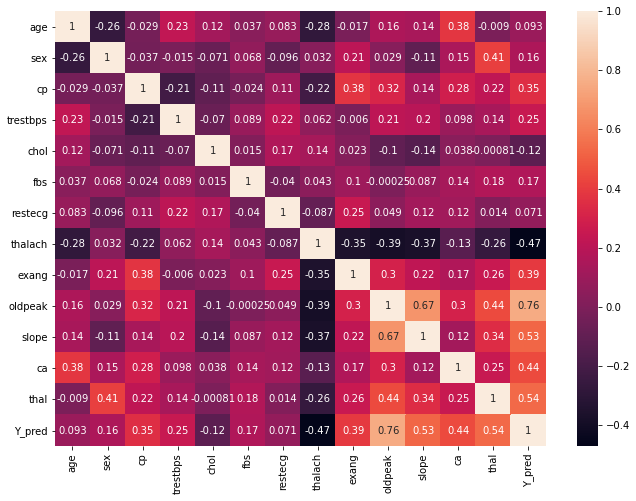

In [18]:
#Testing the correlation between x_test and y_pred
x_test['Y_pred']=y_pred

core=x_test.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,8)
sns.heatmap(core,annot=True,xticklabels=core.columns,yticklabels=core.columns)

This heat map is able to give us the relationship between X_test and the Y_pred of our model.

Inference:

1.We can see that using logistic regression on the preprocessed dataset has given a accuracy score of 86.81%. 
2.The heat maps show that effect on the target variables by the predictors are consistent, thus they have the same correlations.